# Import Libraries and load the data

In [9]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
#loading the data
digits = load_digits()
samples = len(digits.images)
img_data = digits.images.reshape((samples, -1))

In [11]:
X_train_imgs,X_test_imgs, y_train_target, y_test_target = train_test_split(img_data, digits.target, test_size=0.2, random_state=2)
sample_test = X_test_imgs[:3]

In [12]:
model = KNeighborsClassifier()
model.fit(img_data, digits.target)
model.kneighbors([sample_test[0]])

(array([[ 0.        , 16.0623784 , 16.15549442, 16.70329309, 17.72004515]]),
 array([[154, 650, 410, 239, 660]], dtype=int64))

In [13]:
# Function to compare test sample to neighbors in train set
def get_Kneighbors(train_data,train_targets, test_data, num_neighbors):
    model = KNeighborsClassifier(n_neighbors = num_neighbors)
    model.fit(train_data, train_targets)
    neighbors = model.kneighbors(test_data)
    dist = neighbors[0]
    neighbor_imgs = neighbors[1].tolist()[0]
    return dist, neighbor_imgs

def plot_img_and_Kneighbor(train_data,test_data, neighbors):
    test_data = test_data.reshape(8,8)
    imgs = [test_data]
    for neighbor in neighbors:
        corr_img = train_data[neighbor].reshape(8,8)
        imgs.append(corr_img)
    
    imgs.append(test_data)
    
    _, axes = plt.subplots(nrows=1, ncols=len(neighbors)+1, figsize=(10, 3))
    for axs, digit in zip(axes, imgs):
        axs.set_axis_off()
        axs.imshow(digit, cmap= plt.cm.gray_r, interpolation="nearest")


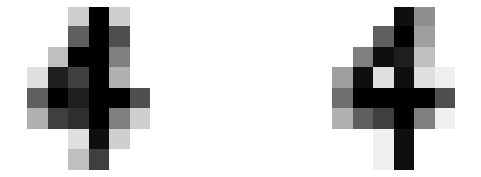

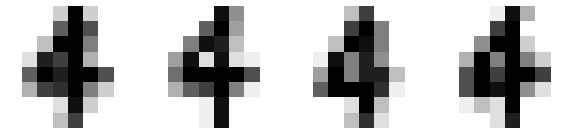

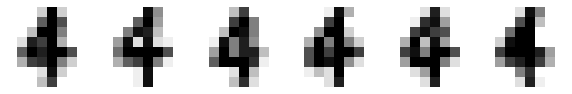

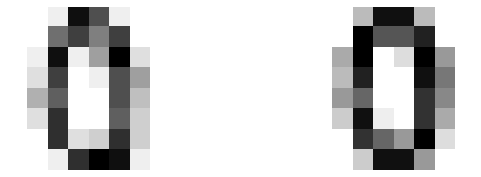

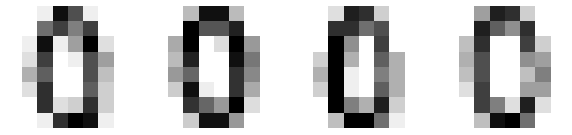

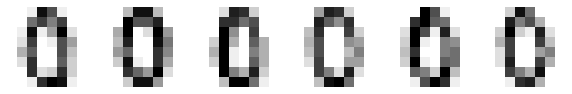

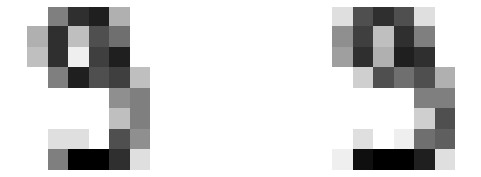

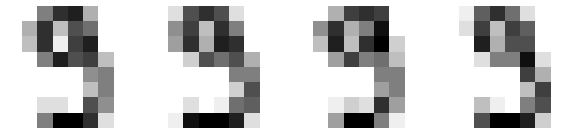

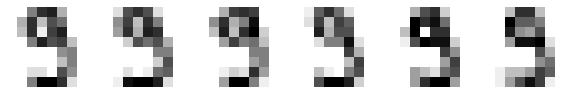

In [19]:
#sample 1 with 1 neighbor like repeating each sample with 1,3,5 neighbors
#first image is the sample from test set
for i in (0,1,2):
    for k in (1,3,5):
        _, neighbors1 = get_Kneighbors(X_train_imgs,y_train_target, [sample_test[i]], k)
        plot_img_and_Kneighbor(X_train_imgs, sample_test[i], neighbors1)   

When the number of neighbors is increased, the neighbors become noticeably different from the test image.

# weight KNN

In [16]:
def get_weighted_kneighbors(train_data, train_targets,test_data, num_neighbors):
    model = KNeighborsClassifier(weights='distance', n_neighbors = num_neighbors)
    model.fit(train_data, train_targets)
    neighbors = model.kneighbors(test_data)
    dist = neighbors[0]
    neighbor_imgs = neighbors[1].tolist()[0]
    return dist, neighbor_imgs

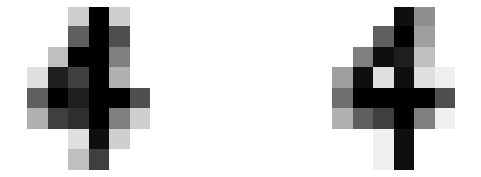

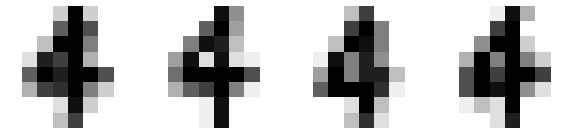

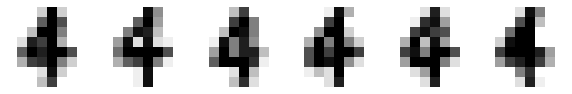

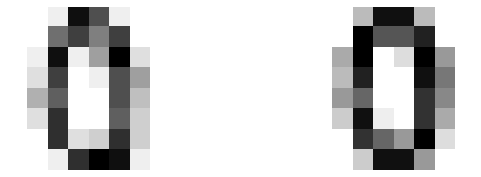

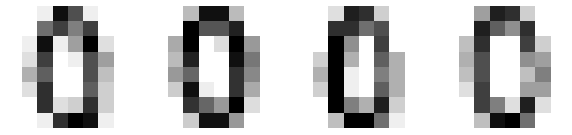

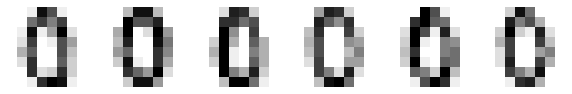

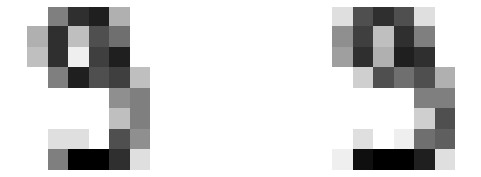

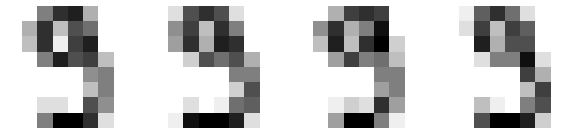

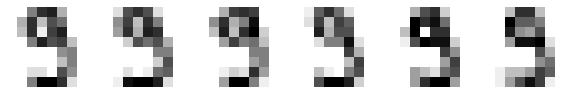

In [20]:
 #sample 1 with 1 neighbor like repeating each sample with 1,3,5 neighbors
for i in (0,1,2):
    for k in (1,3,5):
        _, neighbors1 = get_weighted_kneighbors(X_train_imgs,y_train_target, [sample_test[i]], k)
        plot_img_and_Kneighbor(X_train_imgs, sample_test[i], neighbors1)   

When applying the weighted technique, there is no discernible change in the neighbors.